# Search and Rescue using SpeciesNet and WildFusion

## Problem Statement and Motivation

- A camera trap has transmitted the image/video of an injured animal. We would like to find this particular animal for immediate rescue operations [1].
- A carcass has been found for a rhino in the park and a census needs to be done to know which rhino it was for population management and anti-poaching efforts [2].
- A translocation needs to happen; the rangers need to find Baraka to be the one to move as he was found to be more resilient to environmental changes [3].

These are cases among many others that being able to locate a particular species is necessary for effective wildlife conservation and management.

## Technical Challenges and Solutions

- Another reason for re-identification is that camera traps are really good in monitoring the animals but one limitation is double counting and a myopic view. They only see till where the camera sees since they are static [4].
- The use of drones have risen over the past couple of years as an additional surveillance tool to mitigate poaching and do census [5]. In Kenya, the KWS, the government body overseeing the animal conservation has been carrying out animal population census every 3 years since it is a very costly process and this census involves helicopter surveys [6].
- We propose the use of drones for search and rescue in the case we are looking for a particular species or an individual in the species. We are going to use **SpeciesNet** to be able to identify up to 2k categories of species [7]. We shall then use **WildFusion** either with the **global descriptors** or **local matching** or **both** for individual animal re-identification [8].
- In the case we are not able to find the species and the particular individual, we shall be searching for carcasses and since we do not have the capacity to search for carcasses directly, instead we are going to look at the indicators of death, **vultures**. Vultures feed on carcasses. When searching for an animal in the event we do not completely find it, we look to identify vultures since they are known to be within vicinity of carcasses and perhaps it would be dead. This is in the case of the search for disease transmission [9].
- Focus on Rhinos since they are critically endangered and they lack unique markings that could make them easily identifiable like zebras/giraffes apart from the horn patterns and ear notches which are quite hard to identify from a single photo [10].

## References

[1] Schneider, S., et al. (2019). "Past, present and future approaches using computer vision for animal re‐identification from camera trap data." *Methods in Ecology and Evolution*, 10(4), 461-470.

[2] Ferreira, S. M., et al. (2018). "Disruption of rhino demography by poachers may lead to population declines in Kruger National Park, South Africa." *PloS one*, 13(3), e0192777.

[3] Linklater, W. L. (2003). "Science and management in a conservation crisis: a case study with rhinoceros." *Conservation Biology*, 17(4), 968-975.

[4] Burton, A. C., et al. (2015). "Wildlife camera trapping: a review and recommendations for linking surveys to ecological processes." *Journal of Applied Ecology*, 52(3), 675-685.

[5] Mulero-Pázmány, M., et al. (2017). "Unmanned aircraft systems as a new source of disturbance for wildlife: A systematic review." *PloS one*, 12(6), e0178448.

[6] Kenya Wildlife Service. (2021). "National Wildlife Census 2021 Report." Kenya Wildlife Service, Nairobi.

[7] Tuia, D., et al. (2022). "Perspectives in machine learning for wildlife conservation." *Nature Communications*, 13(1), 792.

[8] Sheppard, J. K., et al. (2015). "Movement heterogeneity and the use of earth observation to predict wildlife movements." *Remote Sensing*, 7(5), 5762-5784.

[9] Ogada, D., et al. (2012). "Dropping dead: causes and consequences of vulture population declines worldwide." *Annals of the New York Academy of Sciences*, 1249(1), 57-71.

[10] Brookes, P. S., et al. (2020). "Individual identification of southern white rhinoceros using convolutional neural networks." *Ecological Informatics*, 57, 101070.

- Step 1: Have a database for rhinos and vultures (images/videos)
- Step 2: Inferencing SpeciesNet to get/show the working
- Step 3: Compute the number of unique rhinos from the dataset
- Step 4: Vultures identification
- Step 5: Manually marking the hotspot for proximity of vultures and carcasses
- Step 6: Live Stitching for this

### SpeciesNet

In [ ]:
!python --version

Python 3.11.13


In [ ]:
!pip install speciesnet==5.0.0 > /dev/null
!curl -L -o model.tar.gz\
  https://www.kaggle.com/api/v1/models/google/speciesnet/pyTorch/v4.0.1b/1/download

!tar -xzvf model.tar.gz

!git clone https://github.com/google/cameratrapai.git > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  199M  100  199M    0     0  25.1M      0  0:00:07  0:00:07 --:--:-- 30.8M
README.md
full_image_88545560_22x8_v12_epoch_00153.labels.txt
full_image_88545560_22x8_v12_epoch_00153.pt
geofence_release.2025.02.27.0702.json
info.json
taxonomy_release.txt
fatal: destination path 'cameratrapai' already exists and is not an empty directory.


In [ ]:
from IPython.display import display
from IPython.display import JSON

from speciesnet import DEFAULT_MODEL
from speciesnet import draw_bboxes
from speciesnet import load_rgb_image
from speciesnet import SpeciesNet
from speciesnet import SUPPORTED_MODELS

In [ ]:
def print_predictions(predictions_dict: dict) -> None:
    print("Predictions:")
    for prediction in predictions_dict["predictions"]:
        print(prediction["filepath"], "=>", prediction["prediction"])

In [ ]:
print("Default SpeciesNet model:", DEFAULT_MODEL)
print("Supported SpeciesNet models:", SUPPORTED_MODELS)

Default SpeciesNet model: kaggle:google/speciesnet/pyTorch/v4.0.1a
Supported SpeciesNet models: ['kaggle:google/speciesnet/pyTorch/v4.0.1a', 'kaggle:google/speciesnet/pyTorch/v4.0.1b']


In [ ]:
model = SpeciesNet('/content')

In [ ]:
!wget https://d1jyxxz9imt9yb.cloudfront.net/medialib/2768/image/s768x1300/IMG_0374_reduced.jpg

In [ ]:
predictions_dict = model.predict(
    instances_dict={
        "instances": [
            {
                "filepath": "/content/cameratrapai/test_data/african_elephants.jpg",
                "latitude": -1.0,
                "longitude": 35.0,
            },
            {
                "filepath": "/content/cameratrapai/test_data/ocelot.jpg",
                "country": "COL",
            },
            {
                "filepath": "/content/cameratrapai/test_data/domestic_cattle.jpg",
                # "latitude": -1.0,
                # "longitude": 35.0,
            },
            {
                "filepath": "/content/IMG_0374_reduced.jpg",
                # "latitude": -1.0,
                # "longitude": 35.0,
            },
        ]
    }
)
# predictions_dict = model.predict(instances_json="test_data/local_instances.json")
# predictions_dict = model.predict(filepaths=[
#     "test_data/african_elephants.jpg",
#     "test_data/ocelot.jpg",
# ])
# predictions_dict = model.predict(filepaths_txt="test_data/local_filepaths.txt")
# predictions_dict = model.predict(folders=["test_data"])
# predictions_dict = model.predict(folders_txt="test_data/local_folders.txt")

print_predictions(predictions_dict)
display(JSON(predictions_dict))

Predictions:
/content/cameratrapai/test_data/african_elephants.jpg => 55631055-3e0e-4b7a-9612-dedebe9f78b0;mammalia;proboscidea;elephantidae;loxodonta;africana;african elephant
/content/cameratrapai/test_data/ocelot.jpg => 22976d14-d424-4f18-a67a-d8e1689cefcc;mammalia;carnivora;felidae;leopardus;pardalis;ocelot
/content/cameratrapai/test_data/domestic_cattle.jpg => aca65aaa-8c6d-4b69-94de-842b08b13bd6;mammalia;cetartiodactyla;bovidae;bos;taurus;domestic cattle
/content/IMG_0374_reduced.jpg => dd39bbd5-077c-482e-9d33-bd176116c870;mammalia;perissodactyla;equidae;equus;quagga;plains zebra


<IPython.core.display.JSON object>

In [ ]:
predictions_dict['predictions'][0]

In [ ]:
predictions_dict['predictions'][0]['detections']

In [ ]:
predictions_dict['predictions'][3]

{'filepath': '/content/IMG_0374_reduced.jpg',
 'classifications': {'classes': ['dd39bbd5-077c-482e-9d33-bd176116c870;mammalia;perissodactyla;equidae;equus;quagga;plains zebra',
   '09fbf931-bbf0-4959-9df6-1082db578281;mammalia;cetartiodactyla;bovidae;connochaetes;taurinus;common wildebeest',
   'b1352069-a39c-4a84-a949-60044271c0c1;aves;;;;;bird',
   '55631055-3e0e-4b7a-9612-dedebe9f78b0;mammalia;proboscidea;elephantidae;loxodonta;africana;african elephant',
   "dc5dbe17-a8ca-40a6-ac6a-3b6b1d63e6d6;mammalia;cetartiodactyla;bovidae;eudorcas;thomsonii;thomson's gazelle"],
  'scores': [0.7709125876426697,
   0.18058280646800995,
   0.012213298119604588,
   0.009715849533677101,
   0.0033257717732340097]},
 'detections': [{'category': '1',
   'label': 'animal',
   'conf': 0.9400368928909302,
   'bbox': [0.1927083283662796,
    0.6249999701976776,
    0.2552083432674408,
    0.2638888955116272]},
  {'category': '1',
   'label': 'animal',
   'conf': 0.9255272150039673,
   'bbox': [0.81510414

In [ ]:
number = 0.9995926535
# Convert to string, find decimal point, and slice
s_number = str(number)
if '.' in s_number:
    decimal_index = s_number.find('.')
    truncated_number = s_number[:decimal_index + 3] # +3 to include the decimal point and two digits
else:
    truncated_number = s_number # No decimal point, no truncation needed

print(truncated_number)

0.99


In [ ]:
predictions_dict['predictions'][2]['classifications']['scores'][0]

0.9997850060462952

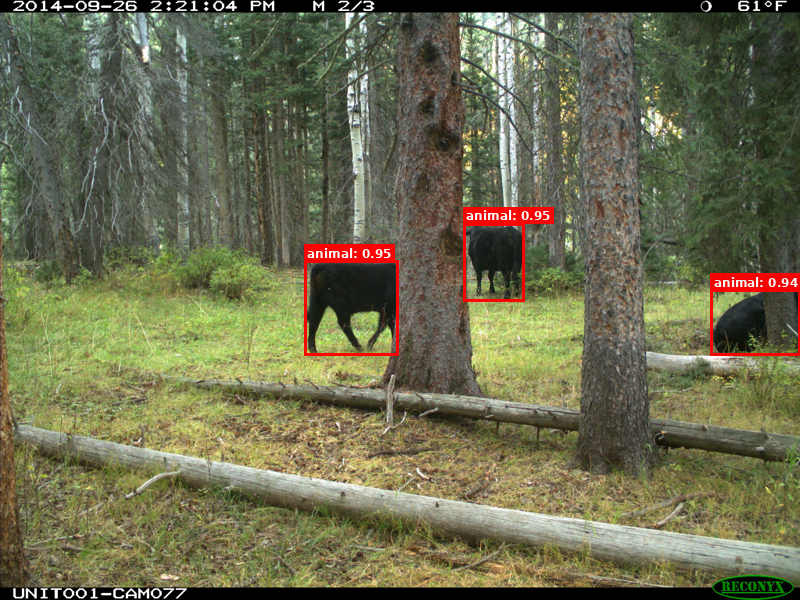

In [ ]:
first_prediction_item = predictions_dict["predictions"][2]
img = load_rgb_image(first_prediction_item["filepath"])
detections = first_prediction_item["detections"]
img.thumbnail(size=(800, 800))
draw_bboxes(img, detections)

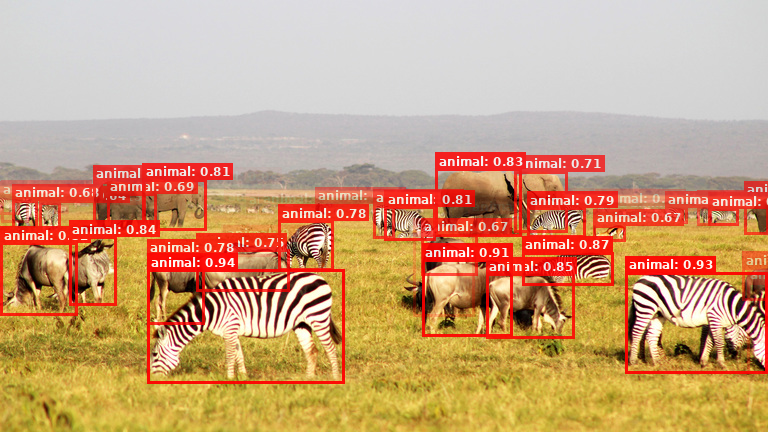

In [ ]:
first_prediction_item = predictions_dict["predictions"][3]
img = load_rgb_image(first_prediction_item["filepath"])
detections = first_prediction_item["detections"]
img.thumbnail(size=(800, 800))
draw_bboxes(img, detections)

In [ ]:
predictions_dict = model.classify(
    filepaths=[
        # "test_data/african_elephants.jpg",
        # "test_data/ocelot.jpg",
        '/content/IMG_0374_reduced.jpg'
    ]
)
display(JSON(predictions_dict))

<IPython.core.display.JSON object>

In [ ]:
predictions_dict['predictions'][0]['classifications'].keys()

dict_keys(['classes', 'scores'])

In [ ]:
predictions_dict = model.detect(
    filepaths=[
        # "test_data/african_elephants.jpg",
        # "test_data/ocelot.jpg",
        '/content/IMG_0374_reduced.jpg'
    ]
)
display(JSON(predictions_dict))

<IPython.core.display.JSON object>

In [ ]:
!mkdir file-th
!cp /content/IMG_0374_reduced.jpg file-th/

In [ ]:
!python -m speciesnet.scripts.run_model --folders "/content/file-th"  \
  --predictions_json "th.json" \
  --model "/content"


I0927 08:50:20.061781 133883634614272 classifier.py:99] Loaded SpeciesNetClassifier in 0.44 seconds on CPU.
I0927 08:50:20.667465 133883634614272 detector.py:99] Loaded SpeciesNetDetector in 0.61 seconds on CPU.
I0927 08:50:20.749363 133883634614272 ensemble.py:71] Loaded SpeciesNetEnsemble in 0.08 seconds.
Detector preprocess   :   0% 0/1 [00:00<?, ?it/s]
Detector predict      :   0% 0/1 [00:00<?, ?it/s]

Classifier preprocess :   0% 0/1 [00:00<?, ?it/s]


Classifier predict    :   0% 0/1 [00:00<?, ?it/s]



Detector preprocess   : 100% 1/1 [00:00<00:00, 24.76it/s]



Geolocation           : 100% 1/1 [00:00<00:00, 25.05it/s]
Detector predict      : 100% 1/1 [00:10<00:00, 10.02s/it]

Classifier preprocess : 100% 1/1 [00:10<00:00, 10.04s/it]


Detector preprocess   : 100% 1/1 [00:11<00:00, 11.26s/it]
Detector predict      : 100% 1/1 [00:11<00:00, 11.26s/it]
Classifier preprocess : 100% 1/1 [00:11<00:00, 11.26s/it]
Classifier predict    : 100% 1/1 [00:11<00:00, 11.26s/it]
Geolocation    

In [ ]:
import json
with open('th.json') as f:
  output_file = json.load(f)

import pandas as pd
output_df = pd.json_normalize(output_file['predictions'])

In [ ]:
output_file.keys()

dict_keys(['predictions'])

In [ ]:
len(output_file['predictions'])

1

In [ ]:
output_df.columns

Index(['filepath', 'detections', 'prediction', 'prediction_score',
       'prediction_source', 'model_version', 'classifications.classes',
       'classifications.scores'],
      dtype='object')

In [ ]:
output_df['prediction']

,prediction
0,dd39bbd5-077c-482e-9d33-bd176116c870;mammalia;...


In [ ]:
output_df['prediction_score']

,prediction_score
0,0.77091


In [ ]:
output_df['prediction_score']

,prediction_score
0,0.77091


In [ ]:
output_file['predictions'][0]['detections']

[{'category': '1',
  'label': 'animal',
  'conf': 0.9400368928909302,
  'bbox': [0.1927083283662796,
   0.6249999701976776,
   0.2552083432674408,
   0.2638888955116272]},
 {'category': '1',
  'label': 'animal',
  'conf': 0.9255272150039673,
  'bbox': [0.8151041492819786,
   0.6296296417713165,
   0.1848958283662796,
   0.23379629850387573]},
 {'category': '1',
  'label': 'animal',
  'conf': 0.9063495993614197,
  'bbox': [0.5494791865348816,
   0.6018518358469009,
   0.1171875,
   0.17824074625968933]},
 {'category': '1',
  'label': 'animal',
  'conf': 0.8711910843849182,
  'bbox': [0.6796875186264515,
   0.5833333469927311,
   0.1184895858168602,
   0.0763888880610466]},
 {'category': '1',
  'label': 'animal',
  'conf': 0.8547310829162598,
  'bbox': [0.6328125186264515,
   0.6342592313885689,
   0.1145833358168602,
   0.15046297013759613]},
 {'category': '1',
  'label': 'animal',
  'conf': 0.8415800929069519,
  'bbox': [0.08984375186264515,
   0.5486110970377922,
   0.0611979179084301

### WildFusion

In [1]:
!pip install git+https://github.com/WildlifeDatasets/wildlife-datasets@develop
!pip install git+https://github.com/WildlifeDatasets/wildlife-tools

  Cloning https://github.com/WildlifeDatasets/wildlife-datasets (to revision develop) to /tmp/pip-req-build-e8n915p4
  Running command git clone --filter=blob:none --quiet https://github.com/WildlifeDatasets/wildlife-datasets /tmp/pip-req-build-e8n915p4
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/WildlifeDatasets/wildlife-datasets to commit e09ae4ae762729bcc096c73da8277f6d71e9d19f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wildlife-datasets: filename=wildlife_datasets-1.0.7-py3-none-any.whl size=102158 sha256=8ba681b59621666303f4cf09d50e6cc762acbe3cbb94f4ce3a0b100585864b08
  Stored in directory: /tmp/pip-ephem-wheel-cache-32eabzlo/wheels/2d/84/b9/40d8ea38f41340a93cbe0d60f5b88eebfa995f5ea6f4a29c3f
Successfully built w

In [7]:
import os
import numpy as np
import pandas as pd
import timm
import torchvision.transforms as T
from wildlife_datasets.datasets import AnimalCLEF2025
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.similarity.wildfusion import SimilarityPipeline, WildFusion
from wildlife_tools.similarity.pairwise.lightglue import MatchLightGlue
from wildlife_tools.features.local import AlikedExtractor
from wildlife_tools.similarity.calibration import IsotonicCalibration

def create_sample_submission(dataset_query, predictions, file_name='sample_submission.csv'):
    df = pd.DataFrame({
        'image_id': dataset_query.metadata['image_id'],
        'identity': predictions
    })
    df.to_csv(file_name, index=False)

In [9]:
!ls -lh

total 8.0K
drwx------ 6 root root 4.0K Sep 29 18:15 drive
drwxr-xr-x 1 root root 4.0K Sep 26 13:40 sample_data


In [10]:
AnimalCLEF2025

wildlife_datasets.datasets.animal_clef.AnimalCLEF2025

In [8]:
root = '/content'
transform_display = T.Compose([
    T.Resize([384, 384]),
])
transform = T.Compose([
    *transform_display.transforms,
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

transforms_aliked = T.Compose([
    T.Resize([512, 512]),
    T.ToTensor()
])

In [6]:
# Loading the dataset
dataset = AnimalCLEF2025(root, load_label=True)
dataset_database = dataset.get_subset(dataset.metadata['split'] == 'database')
dataset_query = dataset.get_subset(dataset.metadata['split'] == 'query')
dataset_calibration = AnimalCLEF2025(root, df=dataset_database.metadata[:100], load_label=True)

n_query = len(dataset_query)

FileNotFoundError: [Errno 2] No such file or directory: '/content/metadata.csv'

## Image Database with WildFusion Similarity Search

This section implements a database system for storing and retrieving animal images using WildFusion similarity matching. The database supports:
- Adding new images with metadata
- Computing and storing feature embeddings
- Similarity-based search and retrieval
- Species-specific querying

In [ ]:
import sqlite3
import json
import hashlib
from pathlib import Path
from datetime import datetime, timedelta
from typing import List, Dict, Tuple, Optional
import pickle
import cv2
from PIL import Image
import torch

In [ ]:
class AnimalImageDatabase:
    """
    A comprehensive database system for storing animal images with WildFusion similarity search capabilities.
    """
    
    def __init__(self, db_path: str = "animal_database.db", features_dir: str = "features/"):
        self.db_path = db_path
        self.features_dir = Path(features_dir)
        self.features_dir.mkdir(exist_ok=True)
        
        # Initialize database
        self._init_database()
        
        # Initialize WildFusion models
        self._init_wildfusion_models()
    
    def _init_database(self):
        """Initialize SQLite database with required tables."""
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()
        
        # Create images table
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS images (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                image_hash TEXT UNIQUE NOT NULL,
                file_path TEXT NOT NULL,
                species TEXT,
                individual_id TEXT,
                latitude REAL,
                longitude REAL,
                timestamp TEXT,
                camera_trap_id TEXT,
                metadata TEXT,
                created_at TEXT DEFAULT CURRENT_TIMESTAMP
            )
        ''')
        
        # Create features table
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS features (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                image_id INTEGER,
                feature_type TEXT,
                feature_file_path TEXT,
                FOREIGN KEY (image_id) REFERENCES images (id)
            )
        ''')
        
        # Create similarity cache table for faster retrieval
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS similarity_cache (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                query_image_hash TEXT,
                similar_image_id INTEGER,
                similarity_score REAL,
                feature_type TEXT,
                computed_at TEXT DEFAULT CURRENT_TIMESTAMP,
                FOREIGN KEY (similar_image_id) REFERENCES images (id)
            )
        ''')
        
        # Create index for faster cache lookups
        cursor.execute('''
            CREATE INDEX IF NOT EXISTS idx_similarity_cache_hash 
            ON similarity_cache (query_image_hash, similarity_score DESC)
        ''')
        
        conn.commit()
        conn.close()
    
    def _init_wildfusion_models(self):
        """Initialize WildFusion models for feature extraction."""
        # Global features using ResNet backbone
        self.global_extractor = DeepFeatures(
            timm.create_model('resnet50', pretrained=True, num_classes=0),
            device='cuda' if torch.cuda.is_available() else 'cpu'
        )
        
        # Store transforms for later use
        self.global_transform = transform
        self.local_transform = transforms_aliked
        
        # Local features using ALIKED
        self.local_extractor = AlikedExtractor(
            device='cuda' if torch.cuda.is_available() else 'cpu'
        )
        
        # Similarity calculators
        self.cosine_similarity = CosineSimilarity()
        self.lightglue_matcher = MatchLightGlue()
        
        # WildFusion pipeline
        self.wildfusion = WildFusion(
            global_similarity=self.cosine_similarity,
            local_similarity=self.lightglue_matcher,
            alpha=0.7  # Weight for global vs local features
        )
    
    def _calculate_image_hash(self, image_path: str) -> str:
        """Calculate MD5 hash of image file for duplicate detection."""
        with open(image_path, 'rb') as f:
            return hashlib.md5(f.read()).hexdigest()
    
    def add_image(self, 
                  image_path: str, 
                  species: str = None, 
                  individual_id: str = None,
                  latitude: float = None,
                  longitude: float = None,
                  camera_trap_id: str = None,
                  metadata: Dict = None) -> int:
        """
        Add a new image to the database with computed features.
        
        Returns:
            int: Database ID of the added image
        """
        image_hash = self._calculate_image_hash(image_path)
        
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()
        
        # Check if image already exists
        cursor.execute("SELECT id FROM images WHERE image_hash = ?", (image_hash,))
        existing = cursor.fetchone()
        if existing:
            print(f"Image already exists in database with ID: {existing[0]}")
            conn.close()
            return existing[0]
        
        # Insert image record
        cursor.execute('''
            INSERT INTO images (image_hash, file_path, species, individual_id, 
                              latitude, longitude, camera_trap_id, metadata, timestamp)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (
            image_hash, image_path, species, individual_id,
            latitude, longitude, camera_trap_id,
            json.dumps(metadata) if metadata else None,
            datetime.now().isoformat()
        ))
        
        image_id = cursor.lastrowid
        conn.commit()
        conn.close()
        
        # Compute and store features
        self._compute_and_store_features(image_id, image_path)
        
        print(f"Added image to database with ID: {image_id}")
        return image_id
    
    def _compute_and_store_features(self, image_id: int, image_path: str):
        """Compute and store both global and local features for an image."""
        # Load image
        image = Image.open(image_path).convert('RGB')
        
        # Apply transforms and compute global features
        global_transformed = self.global_transform(image).unsqueeze(0)  # Add batch dimension
        global_features = self.global_extractor(global_transformed)
        global_feature_path = self.features_dir / f"global_{image_id}.pkl"
        with open(global_feature_path, 'wb') as f:
            pickle.dump(global_features, f)
        
        # Apply transforms and compute local features
        local_transformed = self.local_transform(image).unsqueeze(0)  # Add batch dimension
        local_features = self.local_extractor(local_transformed)
        local_feature_path = self.features_dir / f"local_{image_id}.pkl"
        with open(local_feature_path, 'wb') as f:
            pickle.dump(local_features, f)
        
        # Store feature file paths in database
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()
        
        cursor.execute('''
            INSERT INTO features (image_id, feature_type, feature_file_path)
            VALUES (?, ?, ?)
        ''', (image_id, 'global', str(global_feature_path)))
        
        cursor.execute('''
            INSERT INTO features (image_id, feature_type, feature_file_path)
            VALUES (?, ?, ?)
        ''', (image_id, 'local', str(local_feature_path)))
        
        conn.commit()
        conn.close()
    
    def load_features(self, image_id: int, feature_type: str):
        """Load features for a specific image."""
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()
        
        cursor.execute('''
            SELECT feature_file_path FROM features 
            WHERE image_id = ? AND feature_type = ?
        ''', (image_id, feature_type))
        
        result = cursor.fetchone()
        conn.close()
        
        if result:
            with open(result[0], 'rb') as f:
                return pickle.load(f)
        return None

In [ ]:
def search_similar_images(self, 
                            query_image_path: str, 
                            top_k: int = 10,
                            species_filter: str = None,
                            use_cache: bool = True,
                            similarity_threshold: float = 0.0) -> List[Dict]:
    """
    Search for similar images using WildFusion similarity matching.
    
    Args:
        query_image_path: Path to the query image
        top_k: Number of top similar images to return
        species_filter: Filter results by species
        use_cache: Whether to use cached similarity scores
        similarity_threshold: Minimum similarity score to include in results
        
    Returns:
        List of dictionaries containing similar images and their scores
    """
    # Calculate query image hash for caching
    query_hash = self._calculate_image_hash(query_image_path)
    
    # Check cache first if enabled
    cached_results = []
    if use_cache:
        cached_results = self._get_cached_similarities(query_hash, species_filter, top_k)
        if cached_results:
            print(f"Found {len(cached_results)} cached similarity results")
            return cached_results
    
    # Load query image and compute features
    query_image = Image.open(query_image_path).convert('RGB')
    
    # Apply transforms and compute features
    query_global_transformed = self.global_transform(query_image).unsqueeze(0)
    query_global_features = self.global_extractor(query_global_transformed)
    
    query_local_transformed = self.local_transform(query_image).unsqueeze(0)
    query_local_features = self.local_extractor(query_local_transformed)
    
    # Get all images from database
    conn = sqlite3.connect(self.db_path)
    cursor = conn.cursor()
    
    if species_filter:
        cursor.execute('''
            SELECT id, file_path, species, individual_id, latitude, longitude, metadata
            FROM images WHERE species = ?
        ''', (species_filter,))
    else:
        cursor.execute('''
            SELECT id, file_path, species, individual_id, latitude, longitude, metadata
            FROM images
        ''')
    
    database_images = cursor.fetchall()
    conn.close()
    
    similarities = []
    computed_similarities = []  # For caching
    
    print(f"Computing similarities for {len(database_images)} database images...")
    
    for i, img_record in enumerate(database_images):
        img_id, img_path, species, individual_id, lat, lon, metadata = img_record
        
        # Progress indicator for large datasets
        if i % 50 == 0 and i > 0:
            print(f"Processed {i}/{len(database_images)} images...")
        
        # Load features for database image
        db_global_features = self.load_features(img_id, 'global')
        db_local_features = self.load_features(img_id, 'local')
        
        if db_global_features is None or db_local_features is None:
            print(f"Warning: Missing features for image {img_id}")
            continue
        
        # Compute similarity using WildFusion
        try:
            similarity_score = self.wildfusion(
                query_global_features, query_local_features,
                db_global_features, db_local_features
            )
            
            similarity_float = float(similarity_score)
            
            # Apply similarity threshold
            if similarity_float >= similarity_threshold:
                similarities.append({
                    'image_id': img_id,
                    'file_path': img_path,
                    'species': species,
                    'individual_id': individual_id,
                    'latitude': lat,
                    'longitude': lon,
                    'metadata': json.loads(metadata) if metadata else None,
                    'similarity_score': similarity_float
                })
                
                # Store for caching
                computed_similarities.append((img_id, similarity_float))
            
        except Exception as e:
            print(f"Error computing similarity for image {img_id}: {e}")
            continue
    
    # Sort by similarity score and get top k
    similarities.sort(key=lambda x: x['similarity_score'], reverse=True)
    top_similarities = similarities[:top_k]
    
    # Cache results if enabled
    if use_cache and computed_similarities:
        self._cache_similarities(query_hash, computed_similarities)
    
    print(f"Found {len(top_similarities)} similar images (threshold: {similarity_threshold})")
    return top_similarities

def _get_cached_similarities(self, query_hash: str, species_filter: str = None, top_k: int = 10) -> List[Dict]:
    """Retrieve cached similarity results."""
    conn = sqlite3.connect(self.db_path)
    cursor = conn.cursor()
    
    # Find if we have cached results for this query
    cache_query = '''
        SELECT sc.similar_image_id, sc.similarity_score, i.file_path, i.species, 
                i.individual_id, i.latitude, i.longitude, i.metadata
        FROM similarity_cache sc
        JOIN images i ON sc.similar_image_id = i.id
        WHERE sc.query_image_hash = ?
    '''
    params = [query_hash]
    
    if species_filter:
        cache_query += ' AND i.species = ?'
        params.append(species_filter)
    
    cache_query += ' ORDER BY sc.similarity_score DESC LIMIT ?'
    params.append(top_k)
    
    cursor.execute(cache_query, params)
    cached_rows = cursor.fetchall()
    conn.close()
    
    if not cached_rows:
        return []
    
    return [
        {
            'image_id': row[0],
            'similarity_score': row[1],
            'file_path': row[2],
            'species': row[3],
            'individual_id': row[4],
            'latitude': row[5],
            'longitude': row[6],
            'metadata': json.loads(row[7]) if row[7] else None,
        }
        for row in cached_rows
    ]

def _cache_similarities(self, query_hash: str, similarities: List[Tuple[int, float]]):
    """Cache computed similarity results."""
    conn = sqlite3.connect(self.db_path)
    cursor = conn.cursor()
    
    # Clear existing cache for this query
    cursor.execute('DELETE FROM similarity_cache WHERE query_image_hash = ?', (query_hash,))
    
    # Insert new cache entries
    cache_entries = [
        (query_hash, img_id, score, 'wildfusion', datetime.now().isoformat())
        for img_id, score in similarities
    ]
    
    cursor.executemany('''
        INSERT INTO similarity_cache (query_image_hash, similar_image_id, similarity_score, feature_type, computed_at)
        VALUES (?, ?, ?, ?, ?)
    ''', cache_entries)
    
    conn.commit()
    conn.close()
    
    print(f"Cached {len(cache_entries)} similarity results")

def get_images_by_species(self, species: str) -> List[Dict]:
    """Get all images of a specific species."""
    conn = sqlite3.connect(self.db_path)
    cursor = conn.cursor()
    
    cursor.execute('''
        SELECT id, file_path, species, individual_id, latitude, longitude, metadata, timestamp
        FROM images WHERE species = ?
    ''', (species,))
    
    results = cursor.fetchall()
    conn.close()
    
    return [
        {
            'image_id': row[0],
            'file_path': row[1],
            'species': row[2],
            'individual_id': row[3],
            'latitude': row[4],
            'longitude': row[5],
            'metadata': json.loads(row[6]) if row[6] else None,
            'timestamp': row[7]
        }
        for row in results
    ]

def get_unique_individuals(self, species: str = None) -> Dict:
    """Get count of unique individuals per species."""
    conn = sqlite3.connect(self.db_path)
    cursor = conn.cursor()
    
    if species:
        cursor.execute('''
            SELECT COUNT(DISTINCT individual_id) 
            FROM images WHERE species = ? AND individual_id IS NOT NULL
        ''', (species,))
        count = cursor.fetchone()[0]
        result = {species: count}
    else:
        cursor.execute('''
            SELECT species, COUNT(DISTINCT individual_id) 
            FROM images WHERE individual_id IS NOT NULL
            GROUP BY species
        ''')
        results = cursor.fetchall()
        result = {species: count for species, count in results}
    
    conn.close()
    return result

def add_batch_images(self, image_data: List[Dict]):
    """Add multiple images to the database in batch."""
    for data in image_data:
        self.add_image(**data)

def get_database_stats(self) -> Dict:
    """Get database statistics."""
    conn = sqlite3.connect(self.db_path)
    cursor = conn.cursor()
    
    cursor.execute("SELECT COUNT(*) FROM images")
    total_images = cursor.fetchone()[0]
    
    cursor.execute("SELECT COUNT(DISTINCT species) FROM images WHERE species IS NOT NULL")
    unique_species = cursor.fetchone()[0]
    
    cursor.execute("SELECT COUNT(DISTINCT individual_id) FROM images WHERE individual_id IS NOT NULL")
    unique_individuals = cursor.fetchone()[0]
    
    cursor.execute('''
        SELECT species, COUNT(*) 
        FROM images WHERE species IS NOT NULL
        GROUP BY species
        ORDER BY COUNT(*) DESC
    ''')
    species_counts = dict(cursor.fetchall())
    
    conn.close()
    
    return {
        'total_images': total_images,
        'unique_species': unique_species,
        'unique_individuals': unique_individuals,
        'species_distribution': species_counts
    }

def clear_similarity_cache(self, older_than_days: int = None):
    """Clear similarity cache, optionally only entries older than specified days."""
    conn = sqlite3.connect(self.db_path)
    cursor = conn.cursor()
    
    if older_than_days:
        cutoff_date = (datetime.now() - timedelta(days=older_than_days)).isoformat()
        cursor.execute('DELETE FROM similarity_cache WHERE computed_at < ?', (cutoff_date,))
        deleted_count = cursor.rowcount
        print(f"Cleared {deleted_count} cache entries older than {older_than_days} days")
    else:
        cursor.execute('DELETE FROM similarity_cache')
        deleted_count = cursor.rowcount
        print(f"Cleared all {deleted_count} cache entries")
    
    conn.commit()
    conn.close()

def get_cache_stats(self) -> Dict:
    """Get statistics about the similarity cache."""
    conn = sqlite3.connect(self.db_path)
    cursor = conn.cursor()
    
    cursor.execute('SELECT COUNT(*) FROM similarity_cache')
    total_cache_entries = cursor.fetchone()[0]
    
    cursor.execute('SELECT COUNT(DISTINCT query_image_hash) FROM similarity_cache')
    unique_queries = cursor.fetchone()[0]
    
    cursor.execute('SELECT feature_type, COUNT(*) FROM similarity_cache GROUP BY feature_type')
    cache_by_type = dict(cursor.fetchall())
    
    conn.close()
    
    return {
        'total_cache_entries': total_cache_entries,
        'unique_cached_queries': unique_queries,
        'cache_by_feature_type': cache_by_type
    }

In [ ]:
# Initialize the database
db = AnimalImageDatabase()

print("Animal Image Database initialized successfully!")
print("Database features:")
print("- SQLite database for metadata storage")
print("- WildFusion similarity search with global and local features")
print("- Smart caching system for improved performance")
print("- Species and individual animal tracking")
print("- Geographic location support")
print("- Duplicate detection using image hashing")
print("- Progress tracking for large datasets")
print("- Similarity threshold filtering")

### Example Usage: Adding Images to Database

Let's demonstrate how to add images to our database and perform similarity searches.

In [ ]:
# Example: Adding sample images to the database
sample_images = [
    {
        'image_path': '/content/cameratrapai/test_data/african_elephants.jpg',
        'species': 'Loxodonta africana',
        'individual_id': 'elephant_001',
        'latitude': -1.0,
        'longitude': 35.0,
        'camera_trap_id': 'CT_001',
        'metadata': {'camera_model': 'Reconyx HC600', 'weather': 'clear'}
    },
    {
        'image_path': '/content/cameratrapai/test_data/ocelot.jpg',
        'species': 'Leopardus pardalis',
        'individual_id': 'ocelot_001',
        'camera_trap_id': 'CT_002',
        'metadata': {'camera_model': 'Bushnell Trophy Cam', 'time_of_day': 'night'}
    },
    {
        'image_path': '/content/cameratrapai/test_data/domestic_cattle.jpg',
        'species': 'Bos taurus',
        'individual_id': 'cattle_001',
        'metadata': {'location_type': 'farm_boundary'}
    }
]

# Add images to database (uncomment when ready to run)
# for img_data in sample_images:
#     try:
#         db.add_image(**img_data)
#     except Exception as e:
#         print(f"Error adding image {img_data['image_path']}: {e}")

print("Sample image data prepared for database insertion.")

### Similarity Search Example

In [ ]:
# Example: Search for similar images
def demonstrate_similarity_search(query_image_path, species_filter=None):
    """Demonstrate similarity search functionality."""
    print(f"Searching for images similar to: {query_image_path}")
    if species_filter:
        print(f"Filtering by species: {species_filter}")
    
    try:
        # Perform similarity search
        similar_images = db.search_similar_images(
            query_image_path=query_image_path,
            top_k=5,
            species_filter=species_filter
        )
        
        print(f"\nFound {len(similar_images)} similar images:")
        print("-" * 60)
        
        for i, result in enumerate(similar_images, 1):
            print(f"{i}. Image ID: {result['image_id']}")
            print(f"   File: {result['file_path']}")
            print(f"   Species: {result['species']}")
            print(f"   Individual: {result['individual_id']}")
            print(f"   Similarity Score: {result['similarity_score']:.4f}")
            if result['latitude'] and result['longitude']:
                print(f"   Location: ({result['latitude']}, {result['longitude']})")
            print()
            
    except Exception as e:
        print(f"Error during similarity search: {e}")

# Uncomment to run similarity search example
# demonstrate_similarity_search('/content/IMG_0374_reduced.jpg')

print("Similarity search function defined. Use demonstrate_similarity_search() to test.")

### Database Analytics and Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_database_stats():
    """Create visualizations of database statistics."""
    stats = db.get_database_stats()
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Animal Database Statistics', fontsize=16, fontweight='bold')
    
    # 1. Species distribution pie chart
    if stats['species_distribution']:
        species_names = list(stats['species_distribution'].keys())
        counts = list(stats['species_distribution'].values())
        
        axes[0, 0].pie(counts, labels=species_names, autopct='%1.1f%%', startangle=90)
        axes[0, 0].set_title('Species Distribution')
    else:
        axes[0, 0].text(0.5, 0.5, 'No data available', ha='center', va='center')
        axes[0, 0].set_title('Species Distribution')
    
    # 2. Bar chart of species counts
    if stats['species_distribution']:
        axes[0, 1].bar(species_names, counts, color='skyblue')
        axes[0, 1].set_title('Images per Species')
        axes[0, 1].set_xlabel('Species')
        axes[0, 1].set_ylabel('Number of Images')
        axes[0, 1].tick_params(axis='x', rotation=45)
    else:
        axes[0, 1].text(0.5, 0.5, 'No data available', ha='center', va='center')
        axes[0, 1].set_title('Images per Species')
    
    # 3. Summary statistics
    summary_text = f"""Database Summary:
    
Total Images: {stats['total_images']}
Unique Species: {stats['unique_species']}
Unique Individuals: {stats['unique_individuals']}

Average images per species: {stats['total_images'] / max(stats['unique_species'], 1):.1f}
    """
    axes[1, 0].text(0.1, 0.5, summary_text, fontsize=12, va='center')
    axes[1, 0].set_xlim(0, 1)
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].axis('off')
    axes[1, 0].set_title('Summary Statistics')
    
    # 4. Individual count per species\n    unique_individuals_per_species = db.get_unique_individuals()\n    if unique_individuals_per_species:\n        species = list(unique_individuals_per_species.keys())\n        individual_counts = list(unique_individuals_per_species.values())\n        \n        axes[1, 1].bar(species, individual_counts, color='lightcoral')\n        axes[1, 1].set_title('Unique Individuals per Species')\n        axes[1, 1].set_xlabel('Species')\n        axes[1, 1].set_ylabel('Number of Unique Individuals')\n        axes[1, 1].tick_params(axis='x', rotation=45)\n    else:\n        axes[1, 1].text(0.5, 0.5, 'No individual data available', ha='center', va='center')\n        axes[1, 1].set_title('Unique Individuals per Species')\n    \n    plt.tight_layout()\n    plt.show()\n    \n    return stats\n\n# Function to display database contents\ndef display_database_contents(limit=10):\n    \"\"\"Display the contents of the database.\"\"\"\n    stats = db.get_database_stats()\n    print(\"=\" * 60)\n    print(\"ANIMAL IMAGE DATABASE CONTENTS\")\n    print(\"=\" * 60)\n    \n    print(f\"Total Images: {stats['total_images']}\")\n    print(f\"Unique Species: {stats['unique_species']}\")\n    print(f\"Unique Individuals: {stats['unique_individuals']}\")\n    print()\n    \n    if stats['species_distribution']:\n        print(\"Species Distribution:\")\n        for species, count in stats['species_distribution'].items():\n            print(f\"  {species}: {count} images\")\n        print()\n    \n    # Show individual counts\n    individual_counts = db.get_unique_individuals()\n    if individual_counts:\n        print(\"Unique Individuals per Species:\")\n        for species, count in individual_counts.items():\n            print(f\"  {species}: {count} individuals\")\n    \n    print(\"=\" * 60)\n\n# Display current database status\nprint(\"Database analytics functions defined.\")\nprint(\"Use visualize_database_stats() to see visual analytics.\")\nprint(\"Use display_database_contents() to see database summary.\")

### Search and Rescue Workflow Integration

This section demonstrates how to integrate the database with your search and rescue workflow.

In [ ]:
def search_and_rescue_pipeline(query_image_path: str, scenario: str = "injured_animal"):
    \"\"\"\n    Complete search and rescue pipeline integrating SpeciesNet and WildFusion.\n    \n    Scenarios:\n    - \"injured_animal\": Search for specific injured animal\n    - \"census\": Identify individuals for population census\n    - \"translocation\": Find specific individual for relocation\n    - \"carcass_investigation\": Look for carcass indicators (vultures)\n    \"\"\"\n    print(f\"🚁 SEARCH AND RESCUE PIPELINE\")\n    print(f\"Scenario: {scenario}\")\n    print(f\"Query Image: {query_image_path}\")\n    print(\"=\" * 60)\n    \n    # Step 1: Species identification using SpeciesNet\n    print(\"\\n📊 STEP 1: Species Identification (SpeciesNet)\")\n    try:\n        species_predictions = model.predict(\n            instances_dict={\n                \"instances\": [{\n                    \"filepath\": query_image_path,\n                }]\n            }\n        )\n        \n        if species_predictions['predictions']:\n            prediction = species_predictions['predictions'][0]\n            species_detected = prediction['prediction']\n            confidence = prediction.get('confidence', 0.0)\n            \n            print(f\"✅ Species Detected: {species_detected}\")\n            print(f\"🎯 Confidence: {confidence:.3f}\")\n            \n            # Check for detections\n            detections = prediction.get('detections', [])\n            if detections:\n                print(f\"🔍 Found {len(detections)} animal detections in image\")\n                for i, detection in enumerate(detections):\n                    det_species = detection.get('category', 'Unknown')\n                    det_conf = detection.get('conf', 0.0)\n                    print(f\"   Detection {i+1}: {det_species} (conf: {det_conf:.3f})\")\n        else:\n            print(\"❌ No species detected in image\")\n            return None\n            \n    except Exception as e:\n        print(f\"❌ Error in species identification: {e}\")\n        return None\n    \n    # Step 2: Individual identification using WildFusion database\n    print(f\"\\n🔍 STEP 2: Individual Identification (WildFusion Database)\")\n    \n    # Filter by detected species if available\n    species_filter = species_detected if 'species_detected' in locals() else None\n    \n    try:\n        similar_images = db.search_similar_images(\n            query_image_path=query_image_path,\n            top_k=5,\n            species_filter=species_filter\n        )\n        \n        if similar_images:\n            print(f\"✅ Found {len(similar_images)} similar individuals:\")\n            \n            best_match = similar_images[0]\n            print(f\"\\n🎯 BEST MATCH:\")\n            print(f\"   Individual ID: {best_match['individual_id']}\")\n            print(f\"   Species: {best_match['species']}\")\n            print(f\"   Similarity Score: {best_match['similarity_score']:.4f}\")\n            \n            if best_match['latitude'] and best_match['longitude']:\n                print(f\"   Last Known Location: ({best_match['latitude']}, {best_match['longitude']})\")\n            \n            # Scenario-specific actions\n            if scenario == \"injured_animal\":\n                print(f\"\\n🚨 RESCUE ACTION PLAN:\")\n                print(f\"   - Deploy rescue team to last known coordinates\")\n                print(f\"   - Individual: {best_match['individual_id']}\")\n                print(f\"   - Priority: HIGH (injured animal)\")\n                \n            elif scenario == \"census\":\n                print(f\"\\n📋 CENSUS UPDATE:\")\n                print(f\"   - Individual {best_match['individual_id']} confirmed alive\")\n                print(f\"   - Update population database\")\n                \n            elif scenario == \"translocation\":\n                print(f\"\\n🚚 TRANSLOCATION PLAN:\")\n                print(f\"   - Target: {best_match['individual_id']}\")\n                print(f\"   - Coordinate capture team deployment\")\n                \n        else:\n            print(\"❌ No similar individuals found in database\")\n            \n            # Check for vultures if no direct match (carcass investigation)\n            if scenario == \"carcass_investigation\":\n                print(f\"\\n🦅 STEP 3: Vulture Detection (Carcass Indicators)\")\n                vulture_search = db.search_similar_images(\n                    query_image_path=query_image_path,\n                    species_filter=\"vulture\",\n                    top_k=3\n                )\n                \n                if vulture_search:\n                    print(f\"⚠️  Vultures detected in area - possible carcass nearby\")\n                    for vulture_sighting in vulture_search:\n                        if vulture_sighting['latitude'] and vulture_sighting['longitude']:\n                            print(f\"   Vulture location: ({vulture_sighting['latitude']}, {vulture_sighting['longitude']})\")\n                else:\n                    print(f\"✅ No vulture activity detected\")\n                    \n    except Exception as e:\n        print(f\"❌ Error in similarity search: {e}\")\n        return None\n    \n    print(\"\\n\" + \"=\" * 60)\n    print(\"🏁 PIPELINE COMPLETE\")\n    \n    return {\n        'species_detected': species_detected if 'species_detected' in locals() else None,\n        'similar_images': similar_images,\n        'best_match': best_match if 'best_match' in locals() else None\n    }\n\n# Example usage function\ndef demo_search_and_rescue():\n    \"\"\"Demonstrate the search and rescue pipeline with different scenarios.\"\"\"\n    scenarios = [\n        (\"injured_animal\", \"🚨 Injured animal reported by camera trap\"),\n        (\"census\", \"📊 Population census - identify individual\"),\n        (\"translocation\", \"🚚 Find specific animal for relocation\"),\n        (\"carcass_investigation\", \"🔍 Investigate potential carcass\")\n    ]\n    \n    print(\"🎯 SEARCH AND RESCUE SCENARIOS:\")\n    print(\"=\" * 60)\n    \n    for i, (scenario, description) in enumerate(scenarios, 1):\n        print(f\"{i}. {description}\")\n    \n    print(\"\\nUse search_and_rescue_pipeline(image_path, scenario) to run a specific scenario.\")\n    print(\"Example: search_and_rescue_pipeline('/path/to/image.jpg', 'injured_animal')\")\n\ndemo_search_and_rescue()